<a href="https://colab.research.google.com/github/Lydiaouaili/federatedlearningMNIST/blob/main/FEDAverg_IID%2BNONIID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Federated averaging algorithm
## Introduction
In this section, we present an implementation example of Federated averaging for image classification.

A classical way of using machine learning  nowdays is to involve collecting data in a data center so that the model is trained on powerful servers. However, this conventional method doesn't respect the users' data privacy since data acquisition may be distributed on end devices and the data are then externalized on the cloud servers. Federated learning is an alternative approach to machine elarning, where the data is not collected of data center. In federated learning setting, multiple devices, such as mobile phones, for business infrastructure, contribute to train a model by using theire own data. They contribute to machine learning classifier. The classifier can be any model such as deep neural network, regression,... etc.


This approach is made privacy-friendly, however, federated learning has some properties and  faces challenges:(https://arxiv.org/abs/1602.05629)
* Unbalanced number of data: some users generate vastly more data than others (clients’ datasets may vary substantially in size).
* Different data distribution (Non IID): while some users probably generate the same data, others will generate very different ones. Hence, non IID assumption can be made.
* Limited communication: some users might not be connected at the same time, when the server asks them to sendback model updates.

 **Optimization method**: Gradient descent is a very general algorithm that is capable of finding optimal solutions. The general idea of gradient descent is to gradually correct the parameters in order to minimize a cost fonction. There are different variants of Gradient descent: ordinary gradient descent, stochastic gradient descent, Mini-batch gradient descent.

**Mini-batch gradient descent.** It is a mix of  ordinary gradient descent and stochastic gradient descent : at each step, instead of computing the partial derivatives on the whole of the training set (ordinary DG) or on a single observation (stochastic DG), the gradient descent by mini-batches computes the gradient on small subsets of randomly selected observations called mini-batch. The main advantage over stochastic gradient descent is that the performance is improved thanks to the hardware optimization of matrix operations.

**Brief review of a naive variant of minibatch SGD**

For notational simplicity, assume that
$p$, the number of data, is divisible by the number of mini-batches q. We
partition the examples?? into q mini-batches, each of size
b = p/q. 
Given a random minibatch $I \subset \{1, . . . , n\}$ of size b, we
can define the objective function on $I$ as
$$
\phi_I(\theta)=\frac{1}{| I|} \sum_{i\in I} \phi_i(\theta).
$$
In the simple case where $\Omega=\mathbb{R}^d$, the mini-batch SGD employs
the following stochastic update rule: at each iteration $t$, we
pick a mini-batch $I_t \subset \{1, . . . , n\}$ of size b randomly and let
$$
\theta_{t+1}=\theta_t -\eta_t \nabla \phi_{I_t}(\theta),
$$
where $\eta_t$ is the learning rate. This step can be repeated multiple times, i.e., for multiple epochs $E$.

**The Federated Averaging Algorithm**(https://arxiv.org/abs/1602.05629)

As discussed above, in federated learning, we assume that our data is not centrally stored, but partitioned over $K$ number of clients. Assume that:

* The data is  partitioned over $K$ number of clients. 




*   Each partition can be represented as a set of indices $P_k$ of data points that a given client $k$ holds.

*  $n$ represents the number of all data points collected by all clients and  $n_k$
represents the number of data points that the client holds

*  $n_k=|P_k|$

* Standard definition of minimizing a loss function:

$$
\underset{\theta\in \mathbb{R}^d}{\min}{f(\theta)},
$$
where $$
f(\theta)=\frac{1}{n}\sum_{i=1}^n f_i(\theta)
$$

*  $f_i(\theta)$ :loss for a prediction of one observation $(x_i,y_i)$
*  model parameter: $\theta$

Another way to write the function
$$
f(\theta)=\sum_{k=1}^{K} \frac{n_k}{n }F_k(\theta),\quad F_k(\theta)=\frac{1}{n_k} \sum_{i\in P_k}f_i(\theta).
$$

we reformulate this writing differently: instead of computing the average loss (e.g.  MSE) as an average over $n$ number of samples from a centralized data set as $
f(\theta)=\frac{1}{n}\sum_{i=1}^n f_i(\theta),
$
we compute the average loss $F_k(θ)$ for a specified client k as $F_k(\theta)=\frac{1}{n_k} \sum_{i\in P_k}f_i(\theta).
$ and then
group the loss of all participating clients K, by computing a weighted average loss based on the number of data points $n_k$ that each client holds.

 Analogically to loss function, We also compute the gradients of the federated
model. In a federated setting each client computes the average gradient $g_k$ on its local data as 
$$
g_k= \nabla F_k(\theta)
$$
*  Each client takes a step of gradient descent and updates its parameters accordingly, 
$$
\forall t,\quad \theta_{t+1}= \theta_{t}-\eta \nabla F_k(\theta_{t}).
$$
(This step can be repeated multiple times, i.e., for multiple epochs E )
**(DG, SGD, Mini-batchs SGD....)** The  server then computes the weighted average
$$
\theta= \sum_{k=1}^{K}\frac{n_k}{n} \theta_k.
$$ 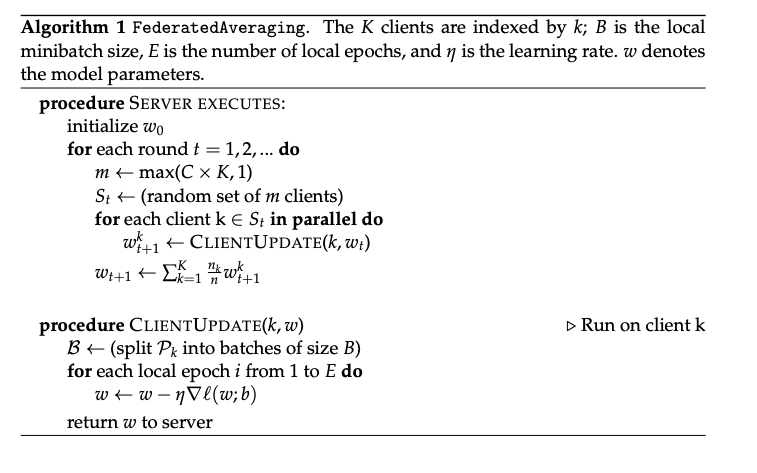



In [ ]:
from google.colab import drive

In [ ]:
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT) 

/content/drive
Mounted at /content/drive




---



# Experimental Results

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image [texte du lien](https://yann.lecun.com/exdb/mnist/). 
Loads the MNIST dataset (tf.keras.datasets.mnist.load_data(path="mnist.npz").
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

* Arguments

path: path where to cache the dataset locally (relative to ~/.keras/datasets).
Returns

* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
* x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
* y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).


In [ ]:
#Import all relevant packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import random

In [ ]:
#import the data

(xxx_train, yyy_train), (xxx_test, yyy_test)= tf.keras.datasets.mnist.load_data(path="mnist.npz")


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

# view the size and type of data
#train data is 3d array which contains 60000 images of shape 28*28 / shape=(60000, 28, 28)
np.shape(xxx_train)

(60000, 28, 28)

In [ ]:
# train label
#label array that contain the classe of number (0,1,2,...,9)/shape((60000,))
np.shape(yyy_train)

(60000,)

In [ ]:
#shape of test data: (10000, 28, 28) (10000 images of dimension (28* 28))
np.shape(xxx_test)

(10000, 28, 28)

In [ ]:

#shape of test label: (10000,)
np.shape(yyy_test)

(10000,)

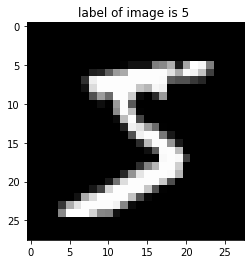

In [ ]:
#example visualisation 
from PIL import Image #package to read image
from matplotlib import pyplot as plt
# i plot first image of 3D array and the associated label
image = Image.fromarray(xxx_train[0])
plt.title('label of image is {} '.format(yyy_train[0]))
plt.imshow(image, cmap='gray')
plt.show()

Since we are going to train the neural network with the descent
gradient, we need to scale the input characteristics. For
a matter of simplicity, we will reduce the pixel intensities to the range
0-1 by dividing them by 255.0 (this also converts them to floating point numbers
floating):

In [ ]:
#i use one-hot to encode the label
yy_train=to_categorical(yyy_train)
yy_test=to_categorical(yyy_test)

In [ ]:
# exemple of one hot encoding
print('label {} is coded by {}'.format(yyy_train[0],yy_train[0]))

label 5 is coded by [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Then the shape of yy_test is (10000, 10) (10 colomns that refers to the encode)
np.shape(yy_test)

(10000, 10)

In [ ]:
# here i concatenate the train data (image) and the associated label
l=list(zip(xx_train, yy_train))
import random
random.seed(100)
nouvelle_liste =l
# i random data
random.shuffle(nouvelle_liste)

To study federated optimization, i also
need to specify how the data is distributed over the clients.
i study two ways of partitioning the MNIST data over
clients following the paper of google : 

* IID, where the data is shuffled, and then partitioned
into 100 clients each receiving 600 examples

* Non-IID,
where we first sort the data by digit label, divide it into 200
shards of size 300, and assign each of 100 clients 2 shards.
This is a pathological non-IID partition of the data, as most
clients will only have examples of two digits.





In [ ]:
### FIRST case IID data 100 clients receive 600 images 
beta=len(nouvelle_liste)//100 #=600 data for each client
beta
utilisateurs=dict()# i create a dictionnary named (utilisateurs) that contain name of client with his associated data
for i in range(0,len(l),beta):
  swa=nouvelle_liste[i:i+beta]
  utilisateurs.update({"client_{}".format(i//beta+1): swa})

In [ ]:
def creat_list_of_client(imagelist,labellist,num_clients):
  data = list(zip(imagelist, labellist))
  random.shuffle(data)
  beta=len(data)//num_clients # 
  utilisateurs=dict()# i create a dictionnary named (utilisateurs) that contain name of client with his associated data
  for i in range(0,len(l),beta):
    swa=data[i:i+beta]
    utilisateurs.update({"client_{}".format(i//beta+1): swa})
  return utilisateurs



Bellow an example showing how the partitioned data is created. I show it from a simple liste that contains 6 elements, and i create 3 clients each one receive 2 elements

In [ ]:
list1 = [('r',17),('d',6),('c',5),('b',7),('t',9),('a',8)]
s=len(list1)//3
s
A=dict()
for i in range(0,len(list1),s):
  swa=list1[i:i+s]
  A.update({"client_{}".format(i//2+1): swa})
A

{'client_1': [('r', 17), ('d', 6)],
 'client_2': [('c', 5), ('b', 7)],
 'client_3': [('t', 9), ('a', 8)]}

# Machine learning model (Creating the Multi Layer Perceptron (MLP) model):






In [ ]:
class SimpleMLP:
    @staticmethod
    def build():
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape=[28, 28]))
        model.add(keras.layers.Dense(200, activation="relu"))
        model.add(keras.layers.Dense(200, activation="relu"))
        model.add(keras.layers.Dense(10, activation="softmax"))
        return model

# Let's detail this code::

* The first line of the function build creates a Sequential model. This is the most simple for neural networks: it consists of a single stack of layers
connected sequentially. This is the Sequential API.

* Then i build the first layer and add it to the model. It's about
a Flatten layer whose role is to convert each input image into
a one-dimensional array: if it receives input data X, it calculates
X.reshape (-1, 1). Since we hade image os size 28*28, after converting matrix to an array  the size will be 784.

* Then, i add a Dense hidden layer consisting of 200 neurons.
It uses the ReLU activation function. Each Dense layer manages its
own weight matrix, which contains all the weights of the connections between the
neurons and their inputs. It also manages a vector of constant terms (bias)
(one per neuron).

* A second Dense hidden layer of 200 neurons is then added, it
also with the ReLU activation function.

* Finally, i add a Dense output layer with 10 neurons (one 
per class) using the softmax activation function (because the classes are
exclusive).

In [ ]:
#fonction that compute n_k/n 
def factor_weight(client_train_data,client_Name):
  #we compute the total number of data for one client 
  local_count=np.sum(list(np.size(client_train_data[client_Name][i][0]) 
   for i in range(0,len(client_train_data[client_Name])) ))
  #we compute the total data of all the client
  lisn=[]
  for cle in client_train_data.keys():
    s= np.sum(list(np.size(client_train_data[cle][i][0]) for i in range(0,len(client_train_data[cle])) ))
    lisn.append(s)
  global_data_clients=np.sum(lisn)
  return local_count/global_data_clients

Recall that the following computations are done by the algorithm:
$$
\forall t,\quad \theta_{t+1}= \theta_{t}-\eta \nabla F_k(\theta_{t}).
$$
(This step can be repeated multiple times, i.e., for multiple epochs E )
 The  server then computes the weighted average
$$
\theta= \sum_{k=1}^{K}\frac{n_k}{n} \theta_k.
$$


* Above, i create a function that compute  $\frac{n_k}{n}$ where  $n$ represents the number of all data points collected by all clients and  $n_k$
represents the number of data points that the client holds.

* Bellow 2 functions, the first one compute $\frac{n_k}{n} \theta_k$ and the second the  weighted average $\sum_{k=1}^{K}\frac{n_k}{n} \theta_k.$

In [ ]:



# this fonction will compute n_k_n* W where n_k/n  is a scalar and W a list of weight of the model client
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final


#sums all clients’ scaled weights together.
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
    return avg_grad

# Federated Model Training (IID data and same model: neural network with 2 hidden layer)





In [ ]:
import matplotlib.pyplot as plt
smlp_global = SimpleMLP()
global_model = smlp_global.build()
ac=list()# accuracy for each round
lc=list()#loss for each round
rd=list()#put round in list

for comm_round in range(30):
  # get the global model's weights - will serve as the initial weights for all local models
  global_weights = global_model.get_weights()
  #print(np.shape(global_weights[0]))  
    
  #initial list to collect local model weights after scalling
  scaled_local_weight_list = []
    #randomize client data -at each round
  client_names= list(utilisateurs.keys())
  random.shuffle(client_names)
  B=random.sample(client_names,100)
  #client_names=set(client_names).difference(set(B))
  #client_names=list(client_names)
  #print(B)
#loop through 10 client  choosen rendomly 
  for client in B:
    smlp_local = SimpleMLP()
    local_model = smlp_local.build()
    local_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=["accuracy"])

        
        #set local model weight to the weight of the global model
    local_model.set_weights(global_weights)
        # seprate label and observations it gives tuple and then convert it to ndimensional array(tensor) to apply the model
    xuti_train,yuti_train=zip(*utilisateurs[client])
       
        #fit local model with client's data
    local_model.fit(np.asarray(xuti_train),np.asarray( yuti_train),epochs=1, verbose=0)
      #scale the model weights and add to list
    scaling_factor = factor_weight(utilisateurs, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    scaled_local_weight_list.append(scaled_weights)
      #scaled_local_weight_list
      #print(np.shape(scaled_local_weight_list[0][3]))
      #clear session to free memory after each communication round
    K.clear_session()
    #we remove the client that already train the model     
    #to get the average over all the local model, we simply take the sum of the scaled weights
  average_weights = sum_scaled_weights(scaled_local_weight_list)
  #for mi in average_weights:
    #print(np.asarray(mi)[0])
  #print(len(average_weights))
    #print(len(average_weights))#ate global model
    #print(np.shape(average_weights[0]))
  global_model.set_weights(average_weights)

   #test global model and print out metrics after each communications round
  cce =tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
  logits = global_model.predict(np.asarray(xx_test))
  #logits= np.argmax(logits, axis=1)
  loss = cce(yy_test, logits)
  acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(yy_test, axis=1))
  ac.append(acc)
  lc.append(loss)
  rd.append(comm_round)
  print('comm_round: {} | global_model_acc: {:.3%} | global_model_loss: {}'.format(comm_round, acc, loss))

comm_round: 0 | global_model_acc: 20.160% | global_model_loss: 2.2927846908569336
comm_round: 1 | global_model_acc: 40.110% | global_model_loss: 2.278977155685425
comm_round: 2 | global_model_acc: 56.710% | global_model_loss: 2.2625954151153564
comm_round: 3 | global_model_acc: 65.660% | global_model_loss: 2.242837905883789
comm_round: 4 | global_model_acc: 70.580% | global_model_loss: 2.2192561626434326
comm_round: 5 | global_model_acc: 73.530% | global_model_loss: 2.1915714740753174
comm_round: 6 | global_model_acc: 75.910% | global_model_loss: 2.160005807876587
comm_round: 7 | global_model_acc: 77.380% | global_model_loss: 2.125514268875122
comm_round: 8 | global_model_acc: 78.570% | global_model_loss: 2.089340925216675
comm_round: 9 | global_model_acc: 79.680% | global_model_loss: 2.0532026290893555
comm_round: 10 | global_model_acc: 80.770% | global_model_loss: 2.018275499343872
comm_round: 11 | global_model_acc: 81.540% | global_model_loss: 1.9855406284332275
comm_round: 12 | glo

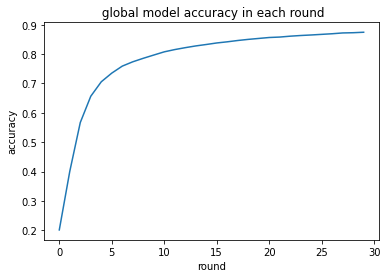

In [ ]:
plt.plot(ac)
#plt.plot(rd)
plt.title(' global model accuracy in each round')
plt.ylabel('accuracy')
plt.xlabel('round')
#plt.legend(['Epoche=1', 'val'], loc='upper left')
plt.show()



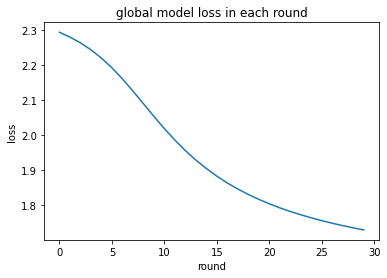

In [ ]:
plt.plot(lc)
#plt.plot(rd)
plt.title('global model loss in each round')
plt.ylabel('loss')
plt.xlabel('round')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Non-IID Data in Federated Learning
If the iid (independent and identically distributed) assumption holds the mathematical and statistical techniques can in general be simplified. For given global distribution,  if we draw sufficiently large sample at random, we can with specific level of confidence state the sample is renpresentative of the ovrall population. When federated learning is applied to the real world, the training data are non-iid, a device’s local data cannot be regarded as samples
drawn from the overall distribution. So, sampling a client's data locally at random  fail to represent the overall distribution.

In federated learning setting, each of $K$ clients has a local data distribution $\mathcal{P}_i$ and a local objectif function. Note that we recover the iid setting when each $\mathcal{P}_i$  is identical.

From [Advances and Open Problems in Federated Learning](https://arxiv.org/pdf/1912.04977.pdf) page 18:" In the case of supervised learning with features $x$ and labels $y$. A statistical model of federated learning involves two levels of sampling: accessing a datapoint requires first sampling a client $i \sim \mathcal{Q}$,
the distribution over available clients, and then drawing an example $(x, y) \sim \mathcal{P}_i(x, y)$ from that client’s local data distribution. When non-IID data in federated learning is referenced, this typically refers to differences between \mathcal{P}_i
and $\mathcal{P}_j$ for different clients $i$ and $j$. However, it is also important to note that the distribution $\mathcal{Q}$ and $\mathcal{P}_j$ may
change over time, introducing another dimension of “non-IIDness”. "

Data can be non-IID in many ways. For exemple (https://arxiv.org/pdf/1912.04977.pdf) page 18, in the case of Label distribution skew (prior probability shift): The marginal distributions $\mathcal{P}_i(y)$ may vary across
clients. For example, when clients are tied to particular geo-regions,
the distribution of labels varies across clients — kangaroos are only in Australia or zoos; a person’s face is only in a few locations worldwide; for mobile device keyboards, certain emoji are used by one demographic but not others.


* **Implementation:** Let's come back to our use case (image classfication). In the first implementation,  the data is shuffled, and then partitioned into 100 clients each receiving 600 examples. Bellow, i follow the same partition of [Experimental Results](https://arxiv.org/abs/1602.05629).First i sort the data by digit label, divide it into 200 shards of size 300, and assign each of 100 clients 2 shards.
This is a pathological non-IID partition of the data, as most
clients will only have examples of two digits. 




In [ ]:
s=0
#unicitee=list(np.vstack({tuple(row) for row in yy_train}))
unicitee = np.unique(yy_train, axis=0)
np.random.shuffle(unicitee)


In [ ]:
np.argmax(unicitee[0])

2

In [ ]:

sub_lab_list = [unicitee[i:i + 2] for i in range(0, len(unicitee), 2)]
utilisateurs2={}
sub_lab_list



[array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)]

In [ ]:
 
utilisateurs2={}

In [ ]:
s=0
for item in sub_lab_list:
  alpha=[(image,label) for (image, label) in zip(list(xx_train),  list(yy_train)) if  (label==item[0]).all() ]
  beta=[(image,label) for (image, label) in zip(list(xx_train), list(yy_train)) if  (label==item[1]).all() ]
  psi=alpha[0:300]+beta[0:300]
  moi,toi=zip(*psi)
  si=list(toi)
  random.shuffle(si)
  initial=''
  for lab in item:
    initial = initial +'_'+ str(np.argmax(lab))
  for i in range(20):
    s=s+1
    utilisateurs2.update({"client_{}_label {}".format(s,initial): psi})




In [ ]:
#visualization name of clients
sss=list(utilisateurs2.keys())
#sss

In [ ]:
#import matplotlib.pyplot as plt

# Global model (NON-IID)

In [ ]:
import matplotlib.pyplot as plt
smlp_global2 = SimpleMLP()
global_model2 = smlp_global2.build()
ac2=list()# accuracy for each round
lc2=list()#loss for each round
rd2=list()#put round in list

for comm_round in range(30):
  # get the global model's weights - will serve as the initial weights for all local models
  global_weights = global_model2.get_weights()
  #print(np.shape(global_weights[0]))  
    
  #initial list to collect local model weights after scalling
  scaled_local_weight_list = []
    #randomize client data -at each round
  client_names= list(utilisateurs2.keys())
  random.shuffle(client_names)
  #B=random.sample(client_names,100)
  #client_names=set(client_names).difference(set(B))
  #client_names=list(client_names)
  #print(B)
#loop through all client  choosen rendomly  for each round
  for client in client_names:
    smlp_local = SimpleMLP()
    local_model = smlp_local.build()
    local_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=["accuracy"])

        
        #set local model weight to the weight of the global model
    local_model.set_weights(global_weights)
        # seprate label and observations it gives tuple and then convert it to ndimensional array(tensor) to apply the model
    xuti_train,yuti_train=zip(*utilisateurs2[client])

       
        #fit local model with client's data
    local_model.fit(np.asarray(xuti_train), np.asarray(yuti_train),epochs=1, verbose=0)
      #scale the model weights and add to list
    scaling_factor = factor_weight(utilisateurs2, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    scaled_local_weight_list.append(scaled_weights)
      #scaled_local_weight_list
      #print(np.shape(scaled_local_weight_list[0][3]))
      #clear session to free memory after each communication round
    K.clear_session()
    #we remove the client that already train the model     
    #to get the average over all the local model, we simply take the sum of the scaled weights
  average_weights = sum_scaled_weights(scaled_local_weight_list)
  #for mi in average_weights:
    #print(np.asarray(mi)[0])
  #print(len(average_weights))
    #print(len(average_weights))#ate global model
    #print(np.shape(average_weights[0]))
  global_model2.set_weights(average_weights)

   #test global model and print out metrics after each communications round
  cce =tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
  logits = global_model2.predict(np.asarray(xx_test))
  #logits= np.argmax(logits, axis=1)
  loss = cce(yy_test, logits)
  acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(yy_test, axis=1))
  ac2.append(acc)
  lc2.append(loss)
  rd2.append(comm_round)
  print('comm_round: {} | global_model_acc: {:.3%} | global_model_loss: {}'.format(comm_round, acc, loss))

comm_round: 0 | global_model_acc: 12.290% | global_model_loss: 2.2954301834106445
comm_round: 1 | global_model_acc: 22.480% | global_model_loss: 2.2836203575134277
comm_round: 2 | global_model_acc: 37.440% | global_model_loss: 2.2692227363586426
comm_round: 3 | global_model_acc: 48.790% | global_model_loss: 2.252683639526367
comm_round: 4 | global_model_acc: 56.530% | global_model_loss: 2.234644889831543
comm_round: 5 | global_model_acc: 61.060% | global_model_loss: 2.2157180309295654
comm_round: 6 | global_model_acc: 64.170% | global_model_loss: 2.196401596069336
comm_round: 7 | global_model_acc: 66.510% | global_model_loss: 2.1770076751708984
comm_round: 8 | global_model_acc: 68.220% | global_model_loss: 2.1580123901367188
comm_round: 9 | global_model_acc: 69.720% | global_model_loss: 2.139498710632324
comm_round: 10 | global_model_acc: 71.060% | global_model_loss: 2.121746063232422
comm_round: 11 | global_model_acc: 72.120% | global_model_loss: 2.104645013809204
comm_round: 12 | glo

In [ ]:
#s=0
#for item in sub_lab_list:
 # alpha=[(image,label) for (image, label) in zip(list(xx_train), list(yyy_train)) if  label == item[0] ]
  #beta=[(image,label) for (image, label) in zip(list(xx_train), list(yyy_train)) if  label == item[1] ]
  #psi=alpha[0:300]+beta[0:300]
  #random.shuffle(psi)
  #print('label est {} le nombre d element est {}'.format(item, len(alpha)) )
  ##random.shuffle(alpha)
  #initial=''
  #for lab in item:
    #initial = initial +'_'+ str(lab)
  #beta=600# i create a dictionnary named (utilisateurs) that contain name of client with his associated data
  #for i in range(0,len(alpha),beta):
   # swa=alpha[i:i+beta]
    #if len(swa)==beta:
     # s=s+1
      #utilisateurs2.update({"client_{}_label {}".format(s,initial): swa})
      
  #print(utilisateurs2.keys())

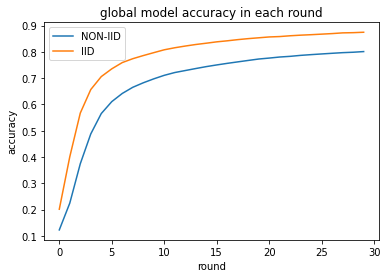

In [ ]:
plt.plot(rd,ac2)
plt.plot(rd,ac)
#plt.plot(rd)
plt.legend(["NON-IID", "IID"])
plt.title('global model accuracy in each round')
plt.ylabel('accuracy')
plt.xlabel('round')
#plt.legend(['Epoche=1', 'val'], loc='upper left')
plt.show()

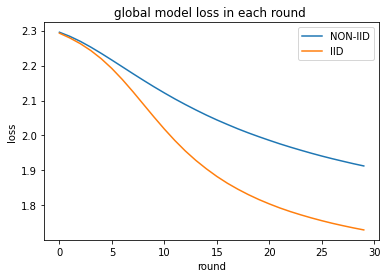

In [ ]:
plt.plot(rd,lc2)
plt.plot(rd,lc)
plt.legend(["NON-IID", "IID"])
plt.title('global model loss in each round ')
plt.ylabel('loss')
plt.xlabel('round')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()